# Codes for Segment Profiling & Segment Description:

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from statsmodels.graphics.mosaicplot import mosaic


In [2]:
data = pd.read_csv('mcdonalds.csv')

In [3]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
data.shape

(1453, 15)

In [5]:
bin = data.iloc[:,0:11] # selecting the segmentation variables

In [6]:
bin

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No


In [7]:
df = pd.get_dummies(bin) # converting to binary values

In [8]:
df = df.drop(df.columns[0::2], axis = 1)

In [9]:
# renaming the columns
df.columns = ["yummy","convenient","spicy","fattening","greasy","fast","cheap","tasty","expensive","healthy","disgusting"]

In [10]:
# adding the descriptor variables
df["Like"] = data["Like"]
df["Age"] = data["Age"]
df["Gender"] = data["Gender"]

In [11]:
data_ = pd.read_csv("Segments.csv") # this file contains the extracted segment

In [12]:
df["segment"] = data_["centroid"]

In [13]:
# renaming the segments
df['segment'] = df['segment'].replace([0,1,2,3,4,5,6,7],['Segment 0',"Segment 1","Segment 2","Segment 3",
                                                        "Segment 4","Segment 5","Segment 6","Segment 7"])

In [14]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Gender,segment
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Female,Segment 1
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Female,Segment 0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Female,Segment 5
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Female,Segment 0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Male,Segment 1


# Mosaic plot: (Like)

- statistic = True
- If true will use a crude statistical model to give colors to the plot. If the tile has a constraint that is more than 2 standard deviation from the expected value under independence hypothesis, it will go from green to red (for positive deviations, blue otherwise) and will acquire an hatching when crosses the 3 sigma.

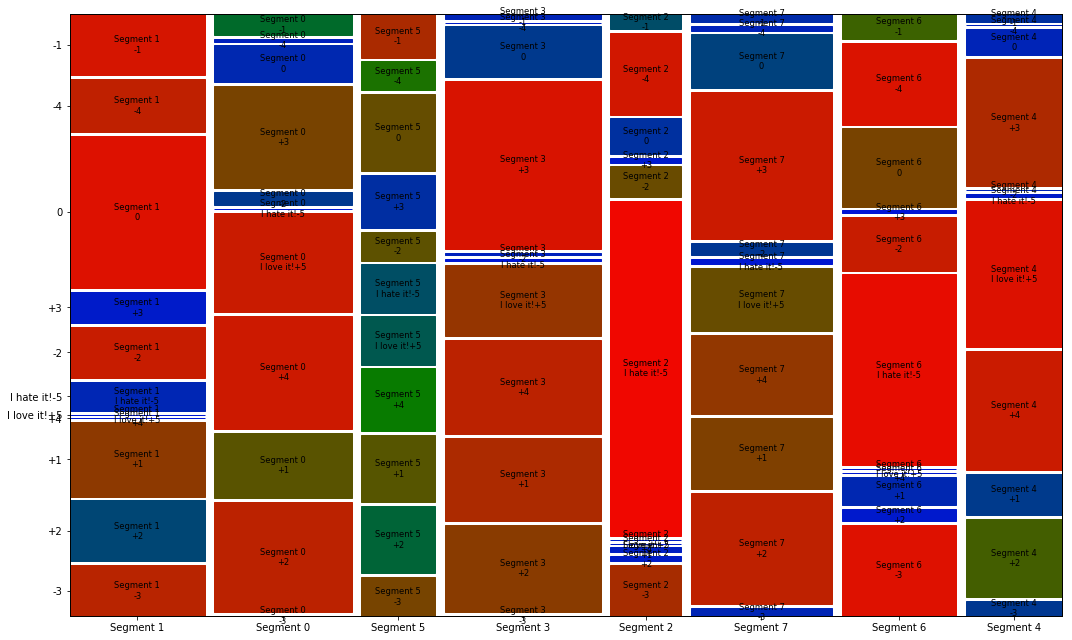

In [15]:
plt.rcParams["figure.figsize"] = [15, 9]
plt.rcParams["figure.autolayout"] = True
mosaic(df, ['segment', 'Like'], gap=0.01,statistic = True)
plt.show()

- red color = highly positive
- blue color = highly negative

# Mosaic plot: (Gender)

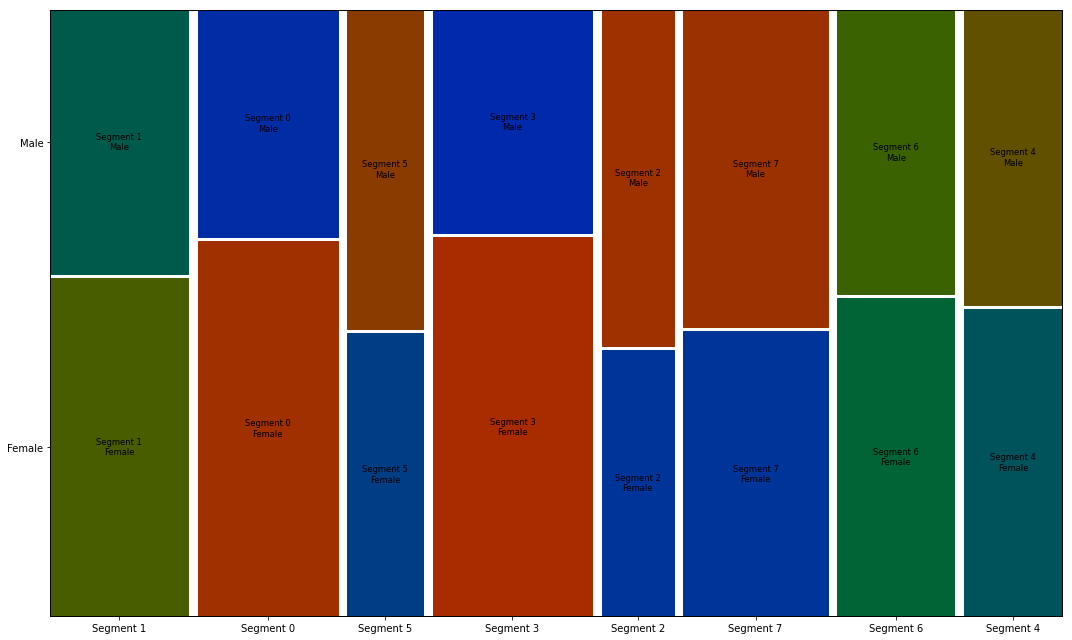

In [16]:
plt.rcParams["figure.figsize"] = [15, 9]
plt.rcParams["figure.autolayout"] = True
mosaic(df, ['segment', 'Gender'],gap=0.01,statistic = True)
plt.show()

# Box plot: (Age)

<AxesSubplot:xlabel='segment', ylabel='Age'>

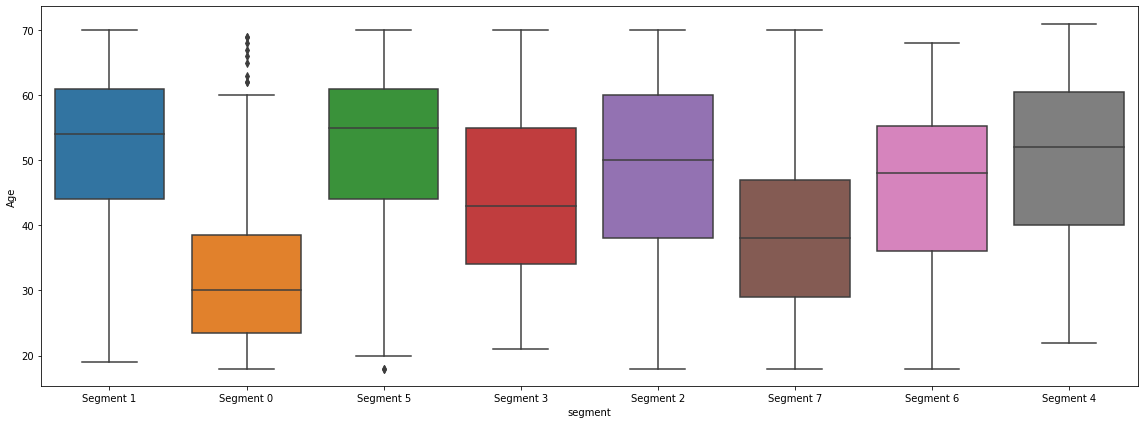

In [17]:
plt.figure(figsize=(16, 6))
sns.boxplot(x = "segment", y = "Age",data = df)

# Segment Seperation Plot: (PCA)

In [18]:
df_new = df.iloc[:,:11]
df_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [19]:
y = df["segment"]

In [20]:
from sklearn.decomposition import PCA
pcamodel = PCA(n_components=2)
pca = pcamodel.fit_transform(df_new)
pca.shape

(1453, 2)

In [21]:
def myplot(score,coeff,labels=True):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
    
# Reference : https://ostwalprasad.github.io/machine-learning/PCA-using-python.html

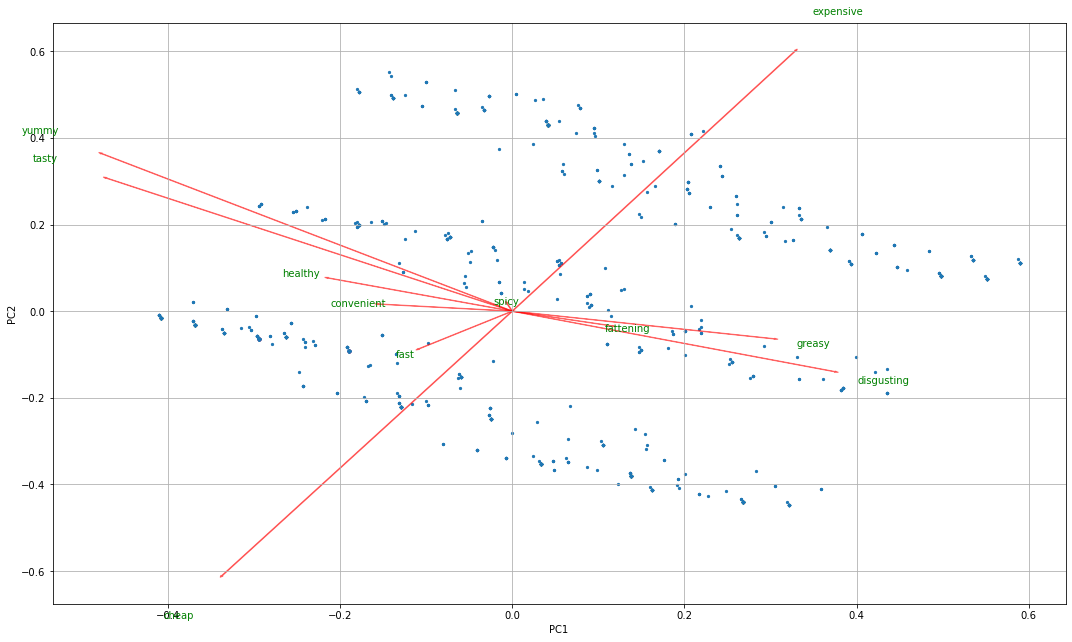

In [22]:
myplot(pca[:,0:2],np.transpose(pcamodel.components_[0:2, :]),list(df_new.columns))
plt.show()

# PCA with labels

In [23]:
pca_data = pd.DataFrame(pca,columns = ["PC1","PC2"])

In [24]:
pca_data["segment"] = df["segment"]

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


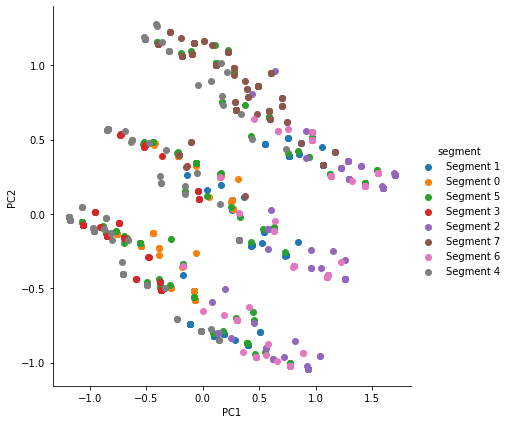

In [25]:
sns.FacetGrid(pca_data, hue="segment", size=6).map(plt.scatter, 'PC1', 'PC2').add_legend()
plt.show()

# Segment Profile Plot:

In [26]:
import warnings
warnings.filterwarnings("ignore")

In [27]:
df_new["segment"] = df["segment"]

In [28]:
def top_feature_(data,target,class_):
    x1 = data.groupby(by = target)
    x2 = x1.get_group(class_)
    x3 = list(dict(x2.mean()).keys())
    x4 = list(dict(x2.mean()).values())
    plt.title("{}".format(class_))
    plt.barh(x3,x4)

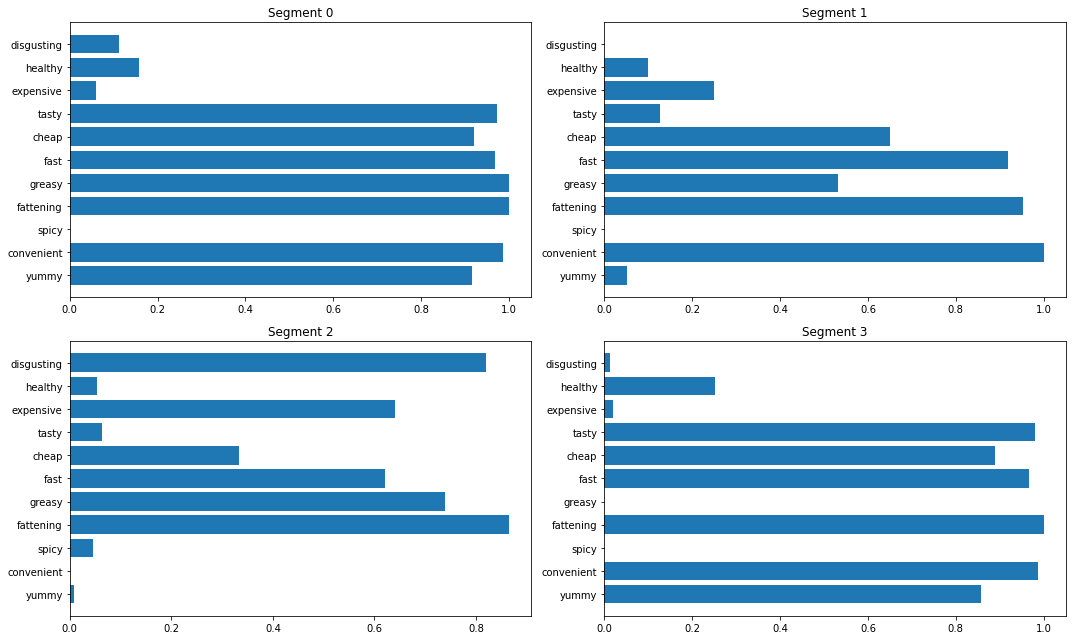

In [29]:
plt.subplot(2,2,1)
top_feature_(df_new,"segment","Segment 0")

plt.subplot(2,2,2)
top_feature_(df_new,"segment","Segment 1")

plt.subplot(2,2,3)
top_feature_(df_new,"segment","Segment 2")

plt.subplot(2,2,4)
top_feature_(df_new,"segment","Segment 3")

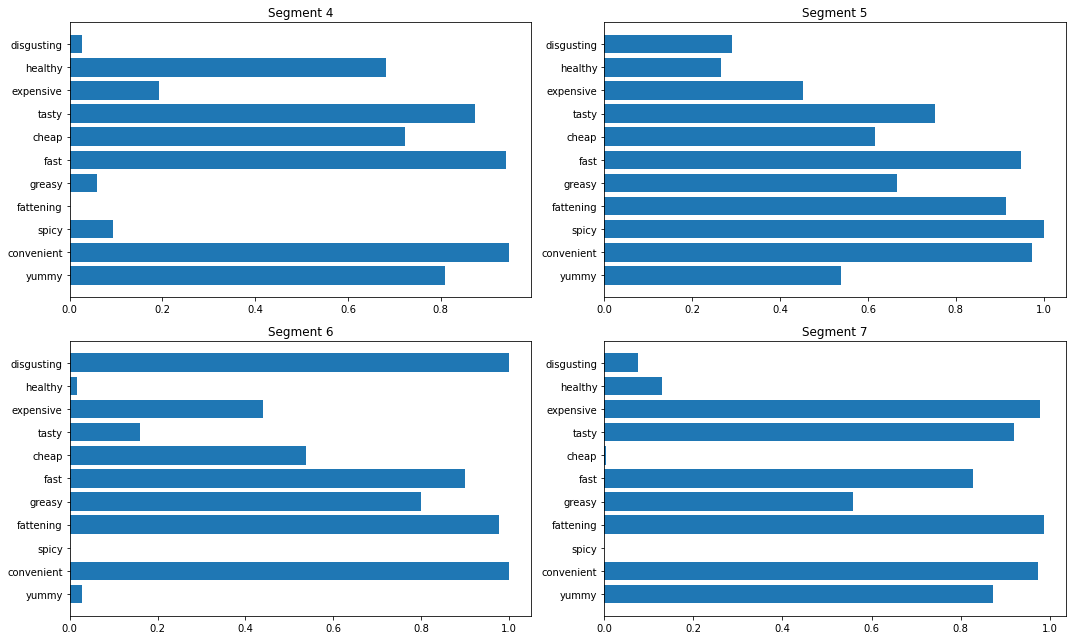

In [30]:
plt.subplot(2,2,1)
top_feature_(df_new,"segment","Segment 4")

plt.subplot(2,2,2)
top_feature_(df_new,"segment","Segment 5")

plt.subplot(2,2,3)
top_feature_(df_new,"segment","Segment 6")

plt.subplot(2,2,4)
top_feature_(df_new,"segment","Segment 7")

In [31]:
#df.to_csv("segment_data.csv")